In [46]:
import numpy as np
import matplotlib.pyplot as plt
from helper.pre_process_target_input import inverse_normalize_data, lognormalize_data
import torch

In [65]:
num_bins = 64

# from linspace_binning_params.csv :
min_data_normed = -0.6580503063096017
max_data_normed = 15.41145449697189

# from data_set_statistcis_dict.csv
mean_filtered_log_data = 0.2649270623955788
std_filtered_log_data = 0.4032066644692276

transform_f = lambda x: np.log(x + 1) if isinstance(x, np.ndarray) else torch.log(x + 1)

In [66]:
min_data_inv_normed = inverse_normalize_data(
    np.array(min_data_normed),
    mean_filtered_log_data, std_filtered_log_data)

max_data_inv_normed = inverse_normalize_data(
    np.array(max_data_normed),
    mean_filtered_log_data, std_filtered_log_data)

print(f'min_data_inv_normed: {min_data_inv_normed}')
print(f'max_data_inv_normed: {max_data_inv_normed}')

min_data_inv_normed: -0.00040312538758624505
max_data_inv_normed: 650.272554266488


In [67]:
cut_off_last_bin_inv_normed = 100

In [68]:
cut_off_last_bin_normed = lognormalize_data(torch.Tensor([cut_off_last_bin_inv_normed]), mean_filtered_log_data, std_filtered_log_data, transform_f, s_normalize=True)
print(f'cut_off_last_bin_normed: {cut_off_last_bin_normed}')

cut_off_last_bin_normed: tensor([10.7890])


In [69]:
    linspace_binning_normed = np.linspace(
        min_data_normed,
        cut_off_last_bin_normed,
        num=num_bins-1,
        endpoint=True) 

In [70]:
linspace_binning_normed

array([[-0.6580503 ],
       [-0.47342056],
       [-0.28879085],
       [-0.10416114],
       [ 0.0804686 ],
       [ 0.26509833],
       [ 0.449728  ],
       [ 0.6343578 ],
       [ 0.8189875 ],
       [ 1.0036172 ],
       [ 1.188247  ],
       [ 1.3728766 ],
       [ 1.5575063 ],
       [ 1.742136  ],
       [ 1.9267659 ],
       [ 2.1113956 ],
       [ 2.2960253 ],
       [ 2.480655  ],
       [ 2.6652846 ],
       [ 2.8499146 ],
       [ 3.0345442 ],
       [ 3.219174  ],
       [ 3.4038036 ],
       [ 3.5884335 ],
       [ 3.773063  ],
       [ 3.9576929 ],
       [ 4.1423225 ],
       [ 4.326952  ],
       [ 4.5115824 ],
       [ 4.696212  ],
       [ 4.8808413 ],
       [ 5.0654707 ],
       [ 5.250101  ],
       [ 5.4347305 ],
       [ 5.61936   ],
       [ 5.8039904 ],
       [ 5.98862   ],
       [ 6.1732492 ],
       [ 6.3578796 ],
       [ 6.542509  ],
       [ 6.7271385 ],
       [ 6.911768  ],
       [ 7.0963984 ],
       [ 7.281028  ],
       [ 7.465657  ],
       [ 7

In [71]:
linspace_binning_inv_normed = inverse_normalize_data(linspace_binning_normed, mean_filtered_log_data, std_filtered_log_data)

In [72]:
linspace_binning_inv_normed

array([[-4.0316582e-04],
       [ 7.6850653e-02],
       [ 1.6007495e-01],
       [ 2.4973130e-01],
       [ 3.4631670e-01],
       [ 4.5036674e-01],
       [ 5.6245828e-01],
       [ 6.8321288e-01],
       [ 8.1329989e-01],
       [ 9.5344055e-01],
       [ 1.1044123e+00],
       [ 1.2670517e+00],
       [ 1.4422603e+00],
       [ 1.6310103e+00],
       [ 1.8343480e+00],
       [ 2.0534005e+00],
       [ 2.2893825e+00],
       [ 2.5436018e+00],
       [ 2.8174686e+00],
       [ 3.1125021e+00],
       [ 3.4303365e+00],
       [ 3.7727351e+00],
       [ 4.1415949e+00],
       [ 4.5389633e+00],
       [ 4.9670410e+00],
       [ 5.4282045e+00],
       [ 5.9250078e+00],
       [ 6.4602056e+00],
       [ 7.0367699e+00],
       [ 7.6578903e+00],
       [ 8.3270140e+00],
       [ 9.0478506e+00],
       [ 9.8244019e+00],
       [ 1.0660964e+01],
       [ 1.1562180e+01],
       [ 1.2533049e+01],
       [ 1.3578948e+01],
       [ 1.4705679e+01],
       [ 1.5919498e+01],
       [ 1.7227118e+01],


In [73]:
max_data_inv_normed

650.272554266488

In [78]:
all_bins_inv_normed = np.append(linspace_binning_inv_normed, max_data_inv_normed)
# all_bins_inv_normed = linspace_binning_inv_normed

Text(0, 0.5, 'Precipitation in mm')

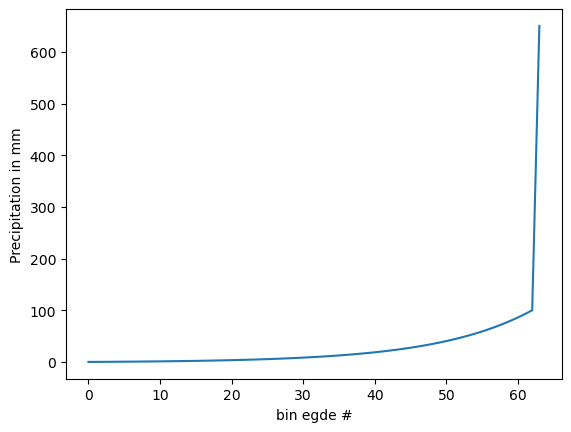

In [81]:
plt.plot(all_bins_inv_normed)
plt.xlabel('bin egde #')
plt.ylabel('Precipitation in mm')
# plt.yscale('log')